# COMP4318/5318 Assignment 2: Image Classification

### Group number: ...  , SID1: ... , SID2: ..., SID3: ... 

This template notebook includes code to load the  dataset and a skeleton for the main sections that should be included in the notebook. Please stick to this struture for your submitted notebook.

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant. See the specification and marking criteria in the associated specification to guide you when completing your implementation.

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [78]:
import numpy as np
from PIL import Image,ImageEnhance,ImageFilter,ImageOps
import matplotlib.pyplot as plt
from skimage.filters import unsharp_mask
from scipy.ndimage import gaussian_filter

## 1. Data loading, exploration, and preprocessing


Code to load the dataset is provided in the following cell. Please proceed with your data exploration and preprocessing in the remainder of this section.

In [ ]:
# Load the dataset training and test sets as numpy arrays
# assuming Assignment2Data folder is present in the same directory 
# as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')


### Examples of preprocessed data
Please print/display some examples of your preprocessed data here.

In [11]:
# print(X_train[0])
img_matrix = X_train[0]
img=Image.fromarray(img_matrix.astype('uint8'))
img_resized = img.resize((255, 255), resample=Image.BILINEAR)
img_resized.show()

In [27]:
print(len(X_train));
print (len(X_test));

32000
8000


In [ ]:
imgArray=[]
for i in range(9):
    imgArray.append([])



for i in range(1000):
    if len(imgArray[y_train[i]])>=10:continue
    imgArray[y_train[i]].append(X_train[i])
    
    
strips = [np.concatenate(imgArray[i], axis=1) for i in range(9)]
mosaic = np.vstack(strips)




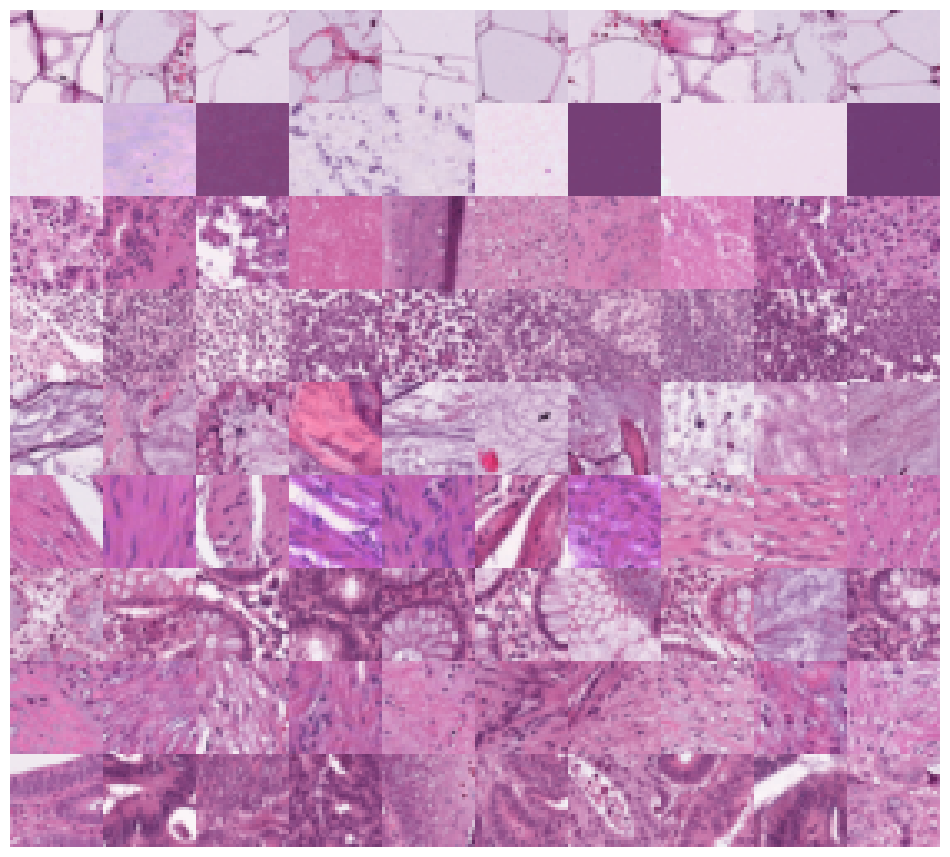

In [35]:
# the original sample
plt.figure(figsize=(12, 12))
plt.imshow(mosaic.astype('uint8'))
plt.axis('off')
plt.show()

In [83]:
#display
def displayImage(X,Y):
    imgArray=[]
    for i in range(9):
        imgArray.append([])



    for i in range(1000):
        if len(imgArray[Y[i]])>=10:continue
        imgArray[Y[i]].append(X[i])
        
        
    strips = [np.concatenate(imgArray[i], axis=1) for i in range(9)]
    mosaic = np.vstack(strips)

    plt.figure(figsize=(10, 10))
    plt.imshow(mosaic)
    plt.axis('off')
    plt.show()

In [ ]:
def batch_contrast_unsharp(X, contrast_factor=2.0, unsharp_radius=1.0, unsharp_amount=1.5):

    alpha = contrast_factor
    mean = 127.5  
    Xf = X.astype(np.float32)
    Xc = (Xf - mean) * alpha + mean
    Xc = np.clip(Xc, 0, 255)

  
    blurred = gaussian_filter(Xc, sigma=(0, unsharp_radius, unsharp_radius, 0))
    detail = Xc - blurred
    Xs = Xc + unsharp_amount * detail
    Xs = np.clip(Xs, 0, 255).astype('uint8')
    return Xs

In [86]:

def autocontrast_equalize(img_array: np.ndarray, cutoff: int = 1) -> np.ndarray:
 
    
    img = Image.fromarray(img_array)
    img = ImageOps.autocontrast(img, cutoff=cutoff)
    img = ImageOps.equalize(img)
    return np.array(img, dtype=np.uint8)

def batch_autocontrast_equalize(X: np.ndarray, cutoff: int = 1) -> np.ndarray:
    return np.stack([autocontrast_equalize(img, cutoff) for img in X], axis=0)


In [89]:

def denoise_median_mode(img_array: np.ndarray, median_size: int = 3, mode_size: int = 3) -> np.ndarray:
    img = Image.fromarray(img_array)
    img = img.filter(ImageFilter.MedianFilter(size=median_size))
    img = img.filter(ImageFilter.ModeFilter(size=mode_size))
    return np.array(img, dtype=np.uint8)

def batch_denoise_median_mode(X: np.ndarray, median_size: int = 3, mode_size: int = 3) -> np.ndarray:

    return np.stack([denoise_median_mode(img, median_size, mode_size) for img in X], axis=0)



In [90]:
#Preprocess result
img=Image.fromarray(mosaic)
enhancer=ImageEnhance.Contrast(img)
img_enhanced=enhancer.enhance(2)

enhanced_np=np.array(img_enhanced)

#1.Contrast
alpha=2.0
mean=127.5

X=X_train.astype(np.float32)
X_train_contrast=(X-mean)*alpha+mean
X_train_contrast=np.clip(X_train_contrast,0,255).astype(np.uint8)

X=X_test.astype(np.float32)
X_test_contrast=(X-mean)*alpha+mean
X_test_contrast=np.clip(X_test_contrast,0,255).astype(np.uint8)

#2.sharp&contrast
X_train_sharp=batch_contrast_unsharp(X_train)
X_test_sharp=batch_contrast_unsharp(X_test)

#3.autocontrast & equalize
X_train_auto=batch_autocontrast_equalize(X_train)
X_test_auto=batch_autocontrast_equalize(X_test)

#4. median & mode denoise
X_train_denoise=batch_denoise_median_mode(X_train)
X_test_denoise=batch_denoise_median_mode(X_test)
 



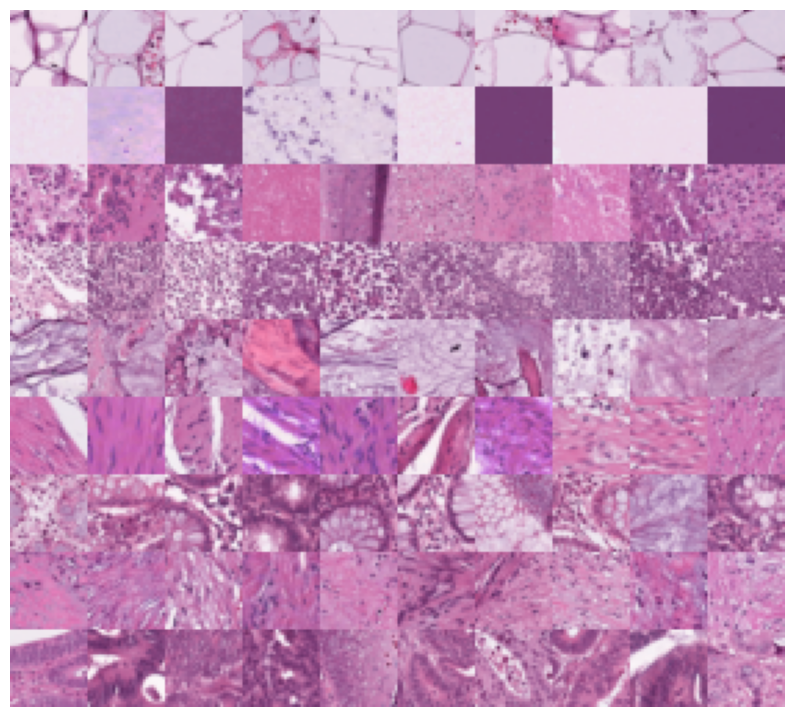

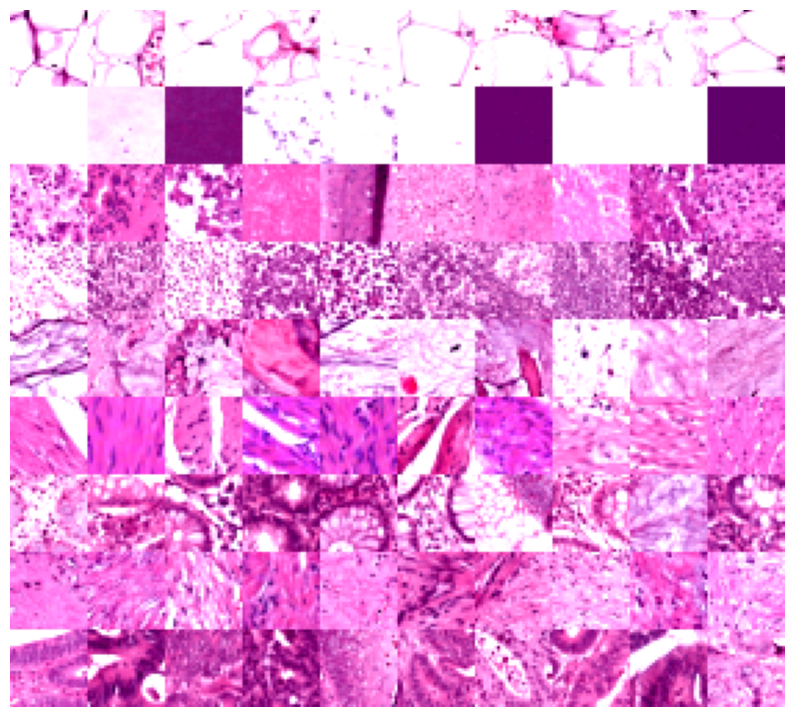

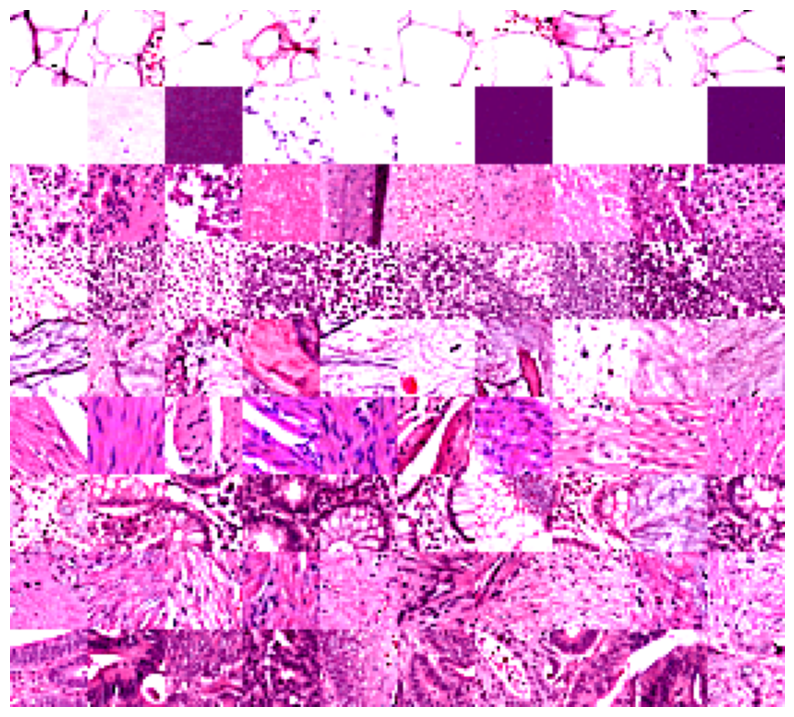

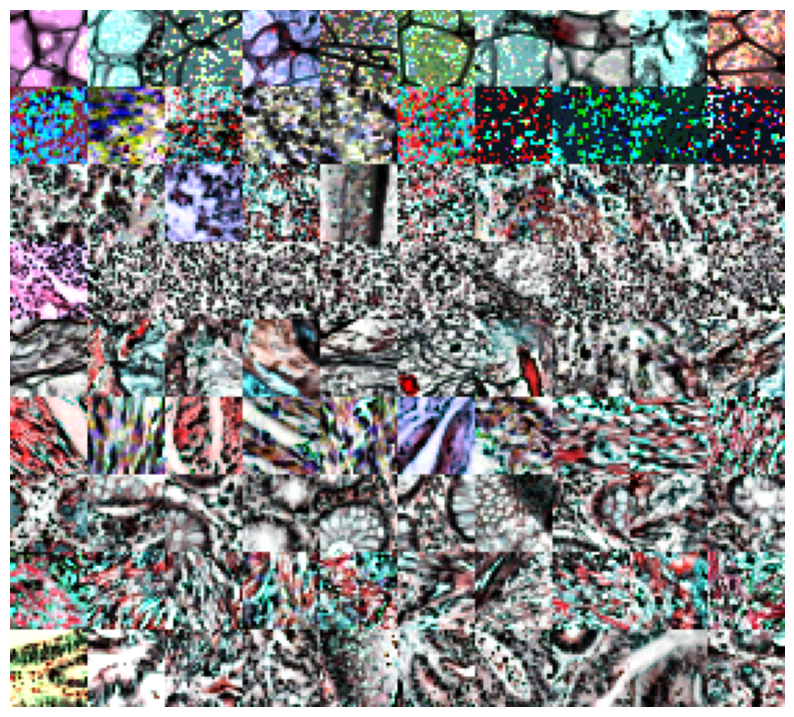

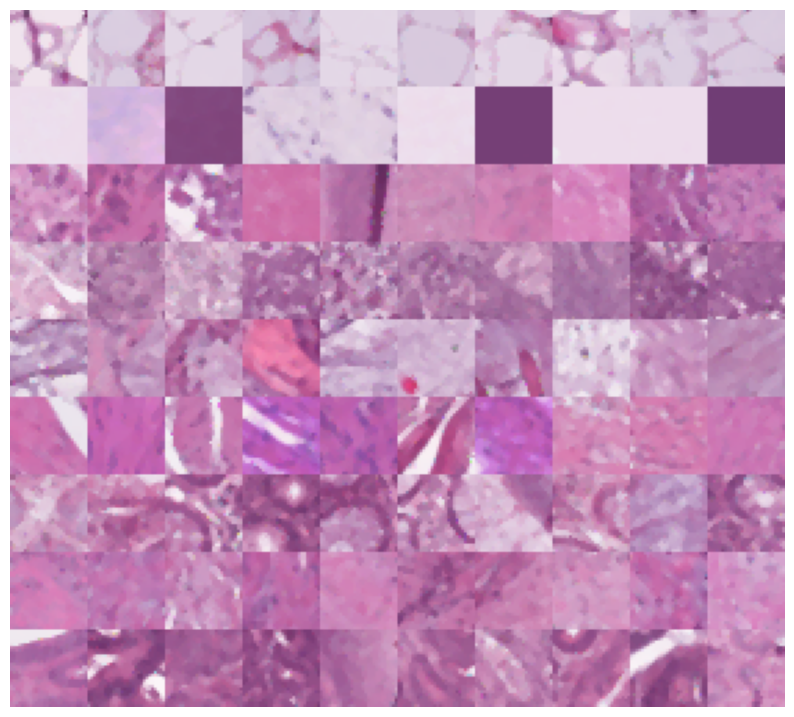

In [92]:
displayImage(X_train,y_train)
displayImage(X_train_contrast,y_train)
displayImage(X_train_sharp,y_train)
displayImage(X_train_auto,y_train)
displayImage(X_train_denoise,y_train)


## 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

### Fully connected neural network

### Convolutional neural network

## 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

### Fully connected neural network

### Convolutional neural network

## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

### Fully connected neural network

### Convolutional neural network